In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [8]:
def pca(X):
    # normalize the features
    X = (X - X.mean()) / X.std()
    
    # compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]
    print('cov \n', cov)
    # print()
    # perform SVD
    U, S, V = np.linalg.svd(cov) # svd: singular value decomposition / linalg: lineare algebra
    
    return U, S, V


def project_data(X, U, k):
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)


def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

Apply CPA

In [9]:
data = loadmat('//home//khalid//pythonfiles//UN//ex7data1.mat')
X = data['X']
print(X.shape)
print(X)
print()

(50, 2)
[[3.38156267 3.38911268]
 [4.52787538 5.8541781 ]
 [2.65568187 4.41199472]
 [2.76523467 3.71541365]
 [2.84656011 4.17550645]
 [3.89067196 6.48838087]
 [3.47580524 3.63284876]
 [5.91129845 6.68076853]
 [3.92889397 5.09844661]
 [4.56183537 5.62329929]
 [4.57407171 5.39765069]
 [4.37173356 5.46116549]
 [4.19169388 4.95469359]
 [5.24408518 4.66148767]
 [2.8358402  3.76801716]
 [5.63526969 6.31211438]
 [4.68632968 5.6652411 ]
 [2.85051337 4.62645627]
 [5.1101573  7.36319662]
 [5.18256377 4.64650909]
 [5.70732809 6.68103995]
 [3.57968458 4.80278074]
 [5.63937773 6.12043594]
 [4.26346851 4.68942896]
 [2.53651693 3.88449078]
 [3.22382902 4.94255585]
 [4.92948801 5.95501971]
 [5.79295774 5.10839305]
 [2.81684824 4.81895769]
 [3.88882414 5.10036564]
 [3.34323419 5.89301345]
 [5.87973414 5.52141664]
 [3.10391912 3.85710242]
 [5.33150572 4.68074235]
 [3.37542687 4.56537852]
 [4.77667888 6.25435039]
 [2.6757463  3.73096988]
 [5.50027665 5.67948113]
 [1.79709714 3.24753885]
 [4.3225147  5.11

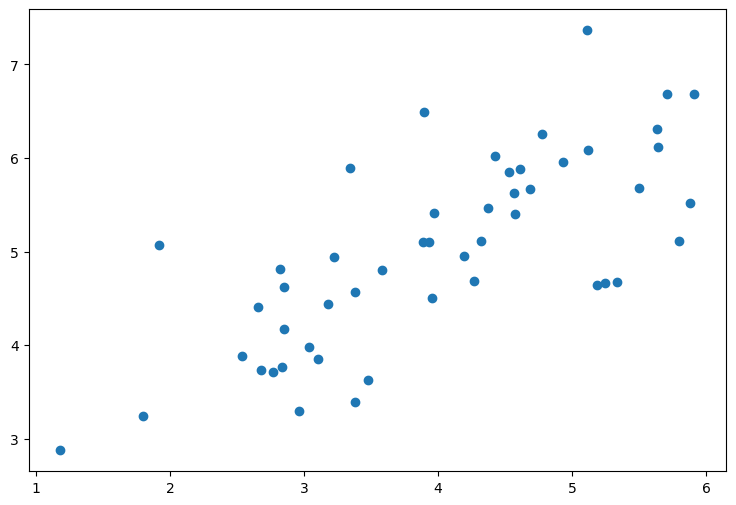

In [10]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(X[:, 0], X[:, 1])

In [11]:
U, S, V = pca(X)
print(U)
print()
print(S)
print()
print(V)

cov 
 [[1.11151143 0.4213388 ]
 [0.4213388  0.88848857]]
[[-0.79241747 -0.60997914]
 [-0.60997914  0.79241747]]

[1.43584536 0.56415464]

[[-0.79241747 -0.60997914]
 [-0.60997914  0.79241747]]


In [12]:
Z = project_data(X, U, 1)
print(Z)

[[-4.74689738]
 [-7.15889408]
 [-4.79563345]
 [-4.45754509]
 [-4.80263579]
 [-7.04081342]
 [-4.97025076]
 [-8.75934561]
 [-6.2232703 ]
 [-7.04497331]
 [-6.91702866]
 [-6.79543508]
 [-6.3438312 ]
 [-6.99891495]
 [-4.54558119]
 [-8.31574426]
 [-7.16920841]
 [-5.08083842]
 [-8.54077427]
 [-6.94102769]
 [-8.5978815 ]
 [-5.76620067]
 [-8.2020797 ]
 [-6.23890078]
 [-4.37943868]
 [-5.56947441]
 [-7.53865023]
 [-7.70645413]
 [-5.17158343]
 [-6.19268884]
 [-6.24385246]
 [-8.02715303]
 [-4.81235176]
 [-7.07993347]
 [-5.45953289]
 [-7.60014707]
 [-4.39612191]
 [-7.82288033]
 [-3.40498213]
 [-6.54290343]
 [-7.17879573]
 [-5.22572421]
 [-4.83081168]
 [-7.23907851]
 [-4.36164051]
 [-6.44590096]
 [-2.69118076]
 [-4.61386195]
 [-5.88236227]
 [-7.76732508]]


In [13]:
X_recovered = recover_data(Z, U, 1)
print(X_recovered)
print(X_recovered.shape)

[[3.76152442 2.89550838]
 [5.67283275 4.36677606]
 [3.80014373 2.92523637]
 [3.53223661 2.71900952]
 [3.80569251 2.92950765]
 [5.57926356 4.29474931]
 [3.93851354 3.03174929]
 [6.94105849 5.3430181 ]
 [4.93142811 3.79606507]
 [5.58255993 4.29728676]
 [5.48117436 4.21924319]
 [5.38482148 4.14507365]
 [5.02696267 3.8696047 ]
 [5.54606249 4.26919213]
 [3.60199795 2.77270971]
 [6.58954104 5.07243054]
 [5.681006   4.37306758]
 [4.02614513 3.09920545]
 [6.76785875 5.20969415]
 [5.50019161 4.2338821 ]
 [6.81311151 5.24452836]
 [4.56923815 3.51726213]
 [6.49947125 5.00309752]
 [4.94381398 3.80559934]
 [3.47034372 2.67136624]
 [4.41334883 3.39726321]
 [5.97375815 4.59841938]
 [6.10672889 4.70077626]
 [4.09805306 3.15455801]
 [4.90719483 3.77741101]
 [4.94773778 3.80861976]
 [6.36085631 4.8963959 ]
 [3.81339161 2.93543419]
 [5.61026298 4.31861173]
 [4.32622924 3.33020118]
 [6.02248932 4.63593118]
 [3.48356381 2.68154267]
 [6.19898705 4.77179382]
 [2.69816733 2.07696807]
 [5.18471099 3.99103461]


Apply PCA on faces

(5000, 1024)


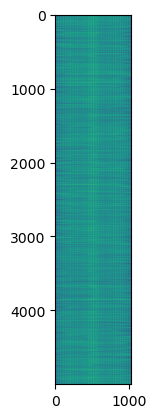

In [14]:
faces = loadmat('//home//khalid//pythonfiles//UN//ex7faces.mat')
X = faces['X']
print(X.shape)
plt.imshow(X)

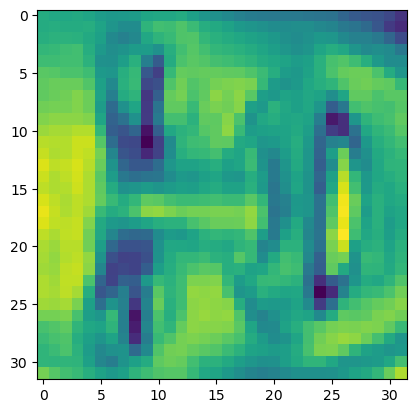

In [15]:
#show one face before PCA
face = np.reshape(X[41,:], (32, 32)) # 41 the number of face
plt.imshow(face)

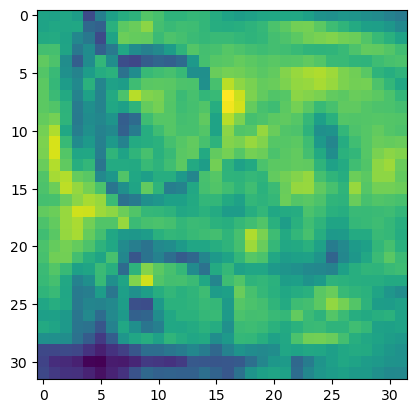

In [16]:
face = np.reshape(X[2490,:], (32, 32)) # 41 the number of face
plt.imshow(face)

In [17]:
U, S, V = pca(X)
Z = project_data(X, U, 100)

cov 
 [[1.57702283 1.51649405 1.41492652 ... 0.34969495 0.38232728 0.40044905]
 [1.51649405 1.51553873 1.44664108 ... 0.33710223 0.36960777 0.3865135 ]
 [1.41492652 1.44664108 1.44721143 ... 0.31888614 0.35201413 0.36938163]
 ...
 [0.34969495 0.33710223 0.31888614 ... 1.9690751  1.97195118 1.90097112]
 [0.38232728 0.36960777 0.35201413 ... 1.97195118 2.09255936 2.08177337]
 [0.40044905 0.3865135  0.36938163 ... 1.90097112 2.08177337 2.18494765]]


In [18]:
X_recovered = recover_data(Z, U, 100)


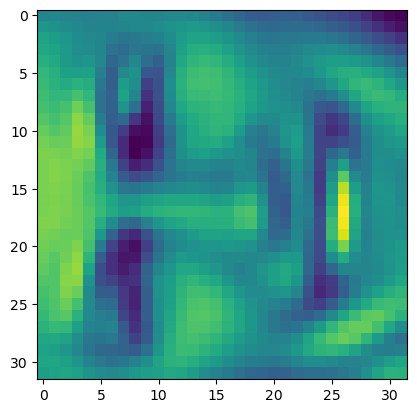

In [19]:
#Pictures after PCA
face = np.reshape(X_recovered[41,:], (32, 32))
plt.imshow(face)